In [1]:
import pandas as pd

In [2]:

df = pd.read_csv('KaggleV2-May-2016.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df.rename(columns={
    'No-show': 'No_show',
    'Hipertension': 'Hypertension',
    'Handcap': 'Handicap'
}, inplace=True)

In [7]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [12]:
df = df[df['Age'] >= 0]

In [13]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [14]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [15]:
df['DaysBetween'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [16]:
df['No_show'] = df['No_show'].map({'Yes': 1, 'No': 0})

In [17]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,DaysBetween
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0,34
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0,34
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0,40
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0,40


In [18]:
df['Weekday'] = df['AppointmentDay'].dt.day_name()

In [19]:
df = pd.get_dummies(df, columns=['Gender', 'Weekday'], drop_first=True)

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'No-show by Age')

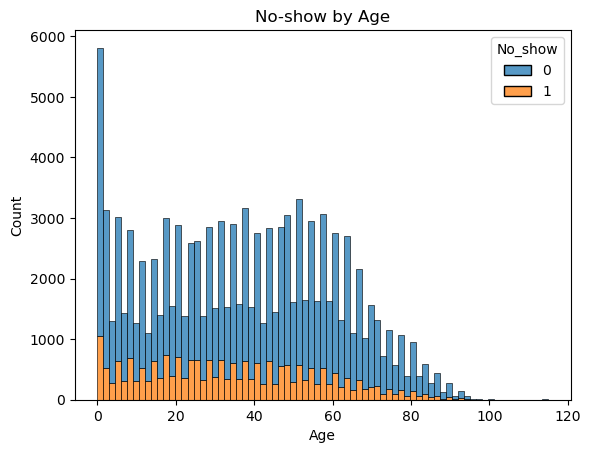

In [21]:
# No-show rate by age
sns.histplot(data=df, x='Age', hue='No_show', multiple='stack')
plt.title("No-show by Age")

Text(0.5, 1.0, 'Impact of SMS reminders')

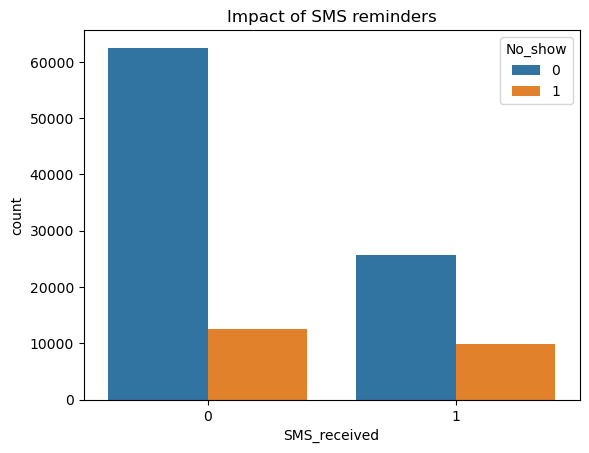

In [22]:
# No-show by SMS received
sns.countplot(x='SMS_received', hue='No_show', data=df)
plt.title("Impact of SMS reminders")

In [24]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [25]:
df['Weekday'] = df['AppointmentDay'].dt.day_name()

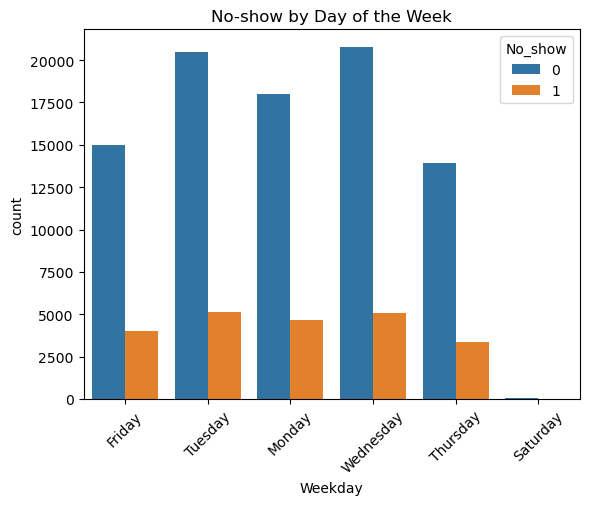

In [26]:

sns.countplot(x='Weekday', hue='No_show', data=df)
plt.title("No-show by Day of the Week")
plt.xticks(rotation=45)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Select features
features = ['Age', 'Scholarship', 'Hypertension', 'Diabetes',
            'Alcoholism', 'Handicap', 'SMS_received', 'DaysBetween'] + \
           [col for col in df.columns if col.startswith('Gender_') or col.startswith('Weekday_')]

In [29]:
X = df[features]

In [30]:
y = df['No_show']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)

In [34]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [35]:
y_pred = model.predict(X_test)

In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.801320908350674


In [37]:
print(confusion_matrix(y_test, y_pred))

[[17705    10]
 [ 4382     9]]


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17715
           1       0.47      0.00      0.00      4391

    accuracy                           0.80     22106
   macro avg       0.64      0.50      0.45     22106
weighted avg       0.74      0.80      0.71     22106



In [39]:
df['Predicted_No_show'] = model.predict(X)

In [40]:
df.to_csv('Cleaned_Appointment_Data.csv', index=False)

In [41]:
df

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,...,No_show,DaysBetween,Gender_M,Weekday_Monday,Weekday_Saturday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Weekday,Predicted_No_show
0,2.987250e+13,5642903,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,...,0,-1,False,False,False,False,False,False,Friday,0
1,5.589978e+14,5642503,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,...,0,-1,True,False,False,False,False,False,Friday,0
2,4.262962e+12,5642549,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,...,0,-1,False,False,False,False,False,False,Friday,0
3,8.679512e+11,5642828,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,...,0,-1,False,False,False,False,False,False,Friday,0
4,8.841186e+12,5642494,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,...,0,-1,False,False,False,False,False,False,Friday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,...,0,34,False,False,False,False,True,False,Tuesday,0
110523,3.596266e+12,5650093,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,...,0,34,False,False,False,False,True,False,Tuesday,0
110524,1.557663e+13,5630692,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,...,0,40,False,False,False,False,True,False,Tuesday,0
110525,9.213493e+13,5630323,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,...,0,40,False,False,False,False,True,False,Tuesday,0


# Performance Optimization

Slow loading visuals or report pages

Large data models or inefficient DAX queries

High memory consumption

 # Data Model Optimization

Too many columns or unnecessary tables

Improper relationships (many-to-many, circular dependencies)

Missing star schema structure

# Visual Design Optimization

Cluttered visuals or inconsistent color schemes

Ineffective or misleading charts

Poor layout and user experience

# Data Accuracy and Logic

Incorrect filters or slicer behavior

Misleading calculations or KPIs

# User Interaction & Usability

Lack of interactivity or drill-through options

Confusing navigation or bookmark usage

# File Size & Refresh Optimization

Large PBIX size

Long refresh times in Power BI Service

